In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader.data as web 
from arch import arch_model
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def required_formatting(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace = True)
    df["returns"] = df["Adj Close"].pct_change().fillna(0)
    df["log_returns"] = np.log(1+df["returns"])*100

In [6]:
# start = dt.datetime(2013, 1, 1)
# end = dt.datetime(2023, 1, 1)
# nifty50 = web.DataReader('^NSEI', 'yahoo', start=start, end=end)
nifty50 = pd.read_csv("NSEI.csv")
required_formatting(nifty50)
required_columns = ["Adj Close","log_returns"]
df = nifty50[required_columns]

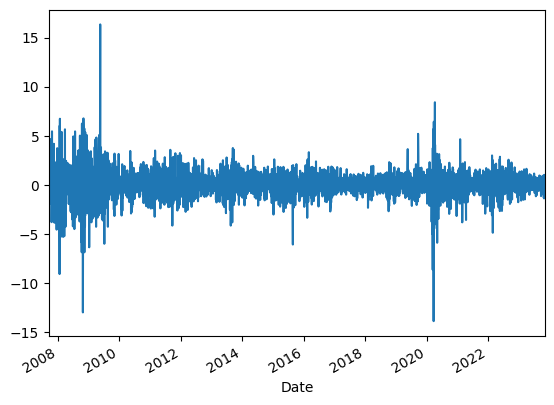

In [7]:
returns = df.log_returns
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [8]:
end_date = df.index[-1]
start_date = end_date - pd.DateOffset(years=5)
returns = df.loc[start_date:end_date]['log_returns'].copy()

In [9]:
# Fit GARCH(1,1) model (you can adjust the order as needed)
model = arch_model(returns, vol='Garch', p=1, q=1)
result = model.fit(update_freq=5)

# Display model summary
print(result.summary())

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1697.7946650568788
Iteration:     10,   Func. Count:     63,   Neg. LLF: 1693.3071141435937
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1693.3071141435937
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1693.31
Distribution:                  Normal   AIC:                           3394.61
Method:            Maximum Likelihood   BIC:                           3415.09
                                        No. Observations:                 1236
Date:                Sun, Nov 12 2023   Df Residuals:                     1235
Time:       

In [10]:
# Fit GJR-GARCH(1,1) model
model_gjr = arch_model(returns, vol='Garch', p=1, q=1, o=1)
result_gjr = model_gjr.fit()

# Display GJR-GARCH model summary
print(result_gjr.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1104646101630.2305
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4845.2033041297755
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3931.460179119821
Iteration:      4,   Func. Count:     34,   Neg. LLF: 7998.074480815895
Iteration:      5,   Func. Count:     41,   Neg. LLF: 1675.8753798667622
Iteration:      6,   Func. Count:     48,   Neg. LLF: 1672.009628120512
Iteration:      7,   Func. Count:     55,   Neg. LLF: 1666.7686340975947
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1666.8725723634761
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1666.7671397996207
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1666.7669567278854
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1666.766956247337
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1666.766956247337
            Iterations: 11
            Function evaluations: 80
            Gradient evaluati

In [11]:
# Compare AIC or BIC
print("GARCH AIC:", result.aic)
print("GJR-GARCH AIC:", result_gjr.aic)

print("GARCH BIC:", result.bic)
print("GJR-GARCH BIC:", result_gjr.bic)

GARCH AIC: 3394.6142282871874
GJR-GARCH AIC: 3343.533912494674
GARCH BIC: 3415.092770839258
GJR-GARCH BIC: 3369.1320906847623


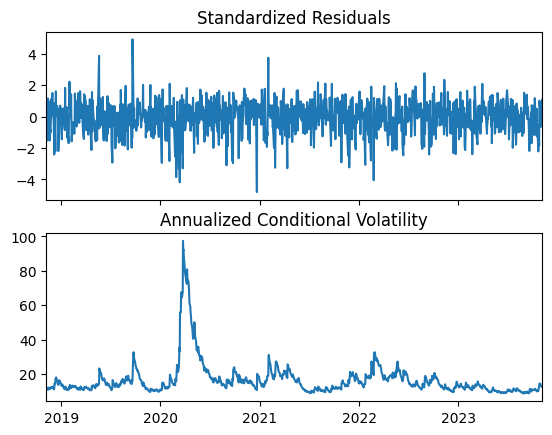

In [12]:
fig = result.plot(annualize="D")

In [13]:
def realized_volatility(log_returns, lookback_period):
    realized_volaility = log_returns.rolling(lookback_period).std()
    return realized_volatility

def garch_model(df):
    data = df.copy()
    index_1 = df.index
    index_count = 0 
    start_date = index_1[index_count]
    end_date = start_date + pd.DateOffset(years=5)
    last_date = index_1[-1]
    while(end_date <= last_date):
        index_count += 1
        start_date = index_1[index_count]
        end_date = start_date + pd.DateOffset(years=5)
    return index_count


In [14]:
result

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1693.31
Distribution:                  Normal   AIC:                           3394.61
Method:            Maximum Likelihood   BIC:                           3415.09
                                        No. Observations:                 1236
Date:                Sun, Nov 12 2023   Df Residuals:                     1235
Time:                        12:18:28   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0771  2.545e-02      3.029  2.456e-03 [2.720e-0

In [15]:
am = arch_model(returns, vol = "GARCH", p=1, o=1, q=1, dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     47,   Neg. LLF: 1650.163416685814
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1648.0791154715223
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1648.0787952736268
            Iterations: 14
            Function evaluations: 110
            Gradient evaluations: 14
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                  log_returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -1648.08
Distribution:      Standardized Student's t   AIC:                           3308.16
Method:                  Maximum Likelihood   BIC:                           3338.88
                                              No. Observations:                 1236
Date:                      Sun, Nov 12 2023   Df 

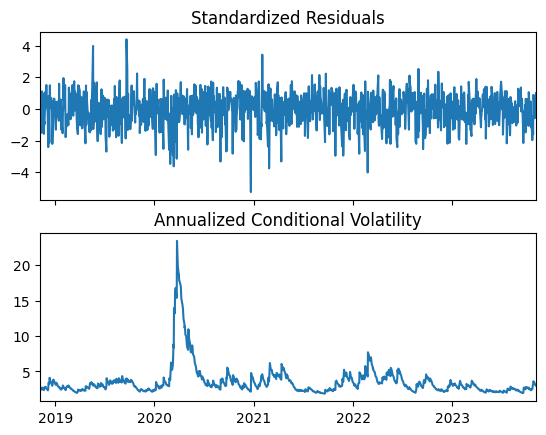

In [16]:
fig = res.plot(annualize="M")

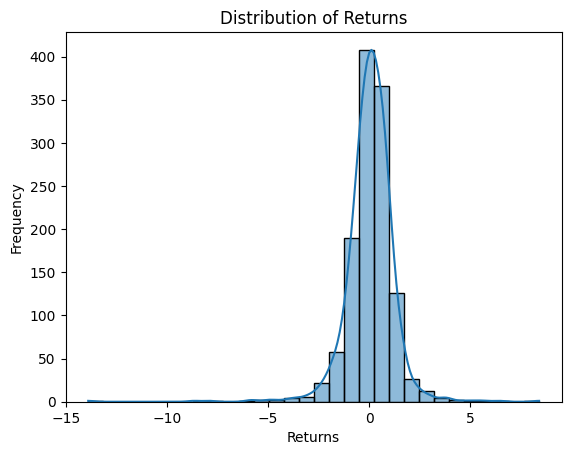

In [17]:
sns.histplot(returns, kde=True, bins=30)
plt.title('Distribution of Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

In [18]:
am = arch_model(returns, vol = "GARCH", p=1, o=0, q=1, dist="skewt")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     44,   Neg. LLF: 1866.608262192115
Iteration:     10,   Func. Count:     85,   Neg. LLF: 1653.8385765360918
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1653.8357923830865
            Iterations: 13
            Function evaluations: 106
            Gradient evaluations: 13
                           Constant Mean - GARCH Model Results                           
Dep. Variable:                       log_returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -1653.84
Distribution:      Standardized Skew Student's t   AIC:                           3319.67
Method:                       Maximum Likelihood   BIC:                           3350.39
                                                   No. Observations:                 1236
Date:         